**Summary of the clustering and Dimension Reduction Process**

K-Medoid and DBSCAN was used to cluster our data in order to find insights from our dataset. Gower distance was used as our distance metrics becaused we have a mixed dataset. However, the output of both K-medoid and DBSCAN showed that the algorithm couldn't converge as the centroid value was **None**. 

TSNE and UMAP was also used to visualise our dataset and the result of both algorithm showed that there are really no clusters in our dataset.

In [1]:
!python --version

Python 3.8.10


In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
diabetes_df = pd.read_csv ('/content/drive/MyDrive/DMP Project/diabetes_012_health_indicators_BRFSS2015.csv')

In [5]:
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


In [8]:
diabetes_df.shape

(253680, 22)

In [9]:
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [10]:
Y = diabetes_df['Diabetes_012'].values

In [11]:
diabetes_dfX = diabetes_df.drop('Diabetes_012', axis=1)
diabetes_dfX.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [12]:
# Separate the numerical, categorical, and ordinal columns
numerical_cols = ['BMI', 'MentHlth', 'PhysHlth']
categorical_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
ordinal_cols = ['GenHlth', 'Age', 'Education', 'Income']

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

In [14]:
# Standardize the numerical and ordinal columns using the StandardScaler
scaler = StandardScaler()
diabetes_dfX[numerical_cols + ordinal_cols] = scaler.fit_transform(diabetes_dfX[numerical_cols + ordinal_cols])

In [15]:
# Treat the binary categorical columns as numerical columns with values 0 and 1
diabetes_dfX[categorical_cols] = diabetes_dfX[categorical_cols].astype('int')

In [16]:
diabetes_dfX[categorical_cols] = scaler.fit_transform(diabetes_dfX[categorical_cols])

In [17]:
# Fit a PCA model on the transformed data
pca = PCA(n_components=diabetes_dfX.shape[1])
pca.fit(diabetes_dfX)

PCA(n_components=21)

In [18]:
#view the explained variance
def plot_scaled_variance(pca):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlabel('Dimension #')
    ax.set_ylabel('Explained Variance Ratio')
    ax.set_title('Variance Explained by each Principal Component')
    ax.plot(pca.explained_variance_ratio_)
    
     
    return ax

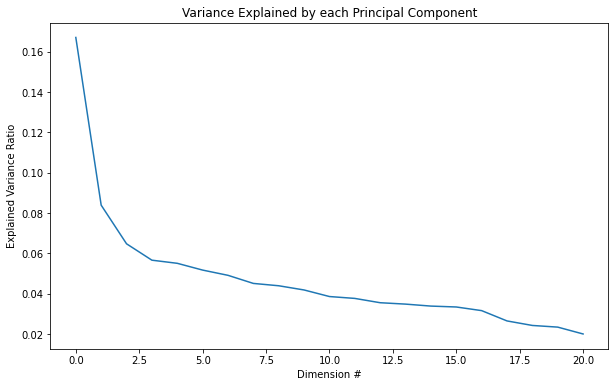

In [ ]:
ax = plot_scaled_variance(pca)

In [19]:
explained_variance_ratio = pca.explained_variance_ratio_
for i, ratio in enumerate(explained_variance_ratio):
    print("Component {}: {:.2f}% of total variance".format(i+1, ratio*100))

Component 1: 16.71% of total variance
Component 2: 8.40% of total variance
Component 3: 6.48% of total variance
Component 4: 5.67% of total variance
Component 5: 5.51% of total variance
Component 6: 5.18% of total variance
Component 7: 4.92% of total variance
Component 8: 4.52% of total variance
Component 9: 4.40% of total variance
Component 10: 4.19% of total variance
Component 11: 3.86% of total variance
Component 12: 3.77% of total variance
Component 13: 3.56% of total variance
Component 14: 3.49% of total variance
Component 15: 3.39% of total variance
Component 16: 3.35% of total variance
Component 17: 3.17% of total variance
Component 18: 2.66% of total variance
Component 19: 2.43% of total variance
Component 20: 2.35% of total variance
Component 21: 2.01% of total variance


I realised that there was no point in reducing the dimension as evident in the output above. PCA didn't really help with the dimension reduction as the amount of variance explained by the components are very small and also it takes 18 components to have 85% explained variance of our data.

So, as a result I will use TSNE to view the original dataset itself.

NB: I will also use KMedoid as well to view the clusters using a subset of the dataset. Though, it was also advised not to do a clustering on a sample of the dataset as this might give us a false representation of the clustering.

**Computing the Gower Distance**

I first tried computing the gower distance on all of our dataset but my kernel kept crashing which I believe is a result of the large size of our dataset(containing 253680 rows). Gower distance creates a square distance matrix with pairwise distances between all pairs of data points in the dataset and this makes it computationally expensive. So, I will use the subset of our dataset.

In [20]:
diabetes_sample1 = diabetes_df.sample(n=20000, random_state=0)
diabetes_sample2 = diabetes_df.sample(n=20000, random_state=123)
diabetes_sample3 = diabetes_df.sample(n=20000, random_state=456)

In [21]:
Y1 = diabetes_sample1['Diabetes_012'].values
len(Y1)

20000

In [22]:
Y2 = diabetes_sample2['Diabetes_012'].values
len(Y2)

20000

In [23]:
Y3 = diabetes_sample3['Diabetes_012'].values
len(Y3)

20000

In [24]:
Xdf_1 = diabetes_sample1.drop('Diabetes_012', axis=1)
X1 = np.asarray(Xdf_1)

In [25]:
Xdf_2 = diabetes_sample2.drop('Diabetes_012', axis=1)
X2 = np.asarray(Xdf_2)

In [26]:
Xdf_3 = diabetes_sample3.drop('Diabetes_012', axis=1)
X3 = np.asarray(Xdf_3)

In [29]:
#!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
#pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00


In [27]:
import gower
gower_dist1 = gower.gower_matrix(X1)

In [28]:
gower_dist2 = gower.gower_matrix(X2)

In [29]:
import sklearn

from sklearn.utils import check_random_state
from sklearn_extra.cluster import KMedoids

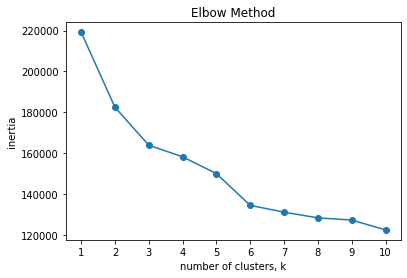

In [35]:
#select the optimum number of clusters for k-means classification using inertia from the KMean
#Inertia measures how spread the clusters are 
ks = range (1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMedoids(n_clusters=k)
    
    # Fit model to samples
    model.fit(X1)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

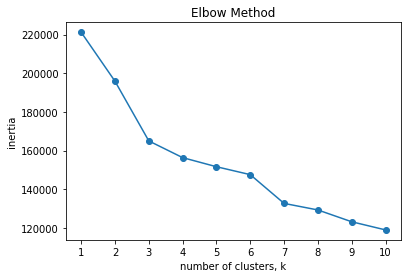

In [36]:
ks = range (1,11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMedoids(n_clusters=k)
    
    # Fit model to samples
    model.fit(X2)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.title('Elbow Method')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

Computing K-medoid on the first sample

In [76]:
# Perform KMedoids clustering using the square distance matrix
Model1 = KMedoids(n_clusters=3, metric='precomputed', random_state=0).fit(gower_dist1)

#Get the cluster label for the inputs
labels = Model1.labels_

# get index of medoid for each cluster
medoid_cluster = Model1.cluster_centers_


In [32]:
print(labels)

[1 2 1 ... 0 1 0]


In [33]:
print(medoid_cluster)

None


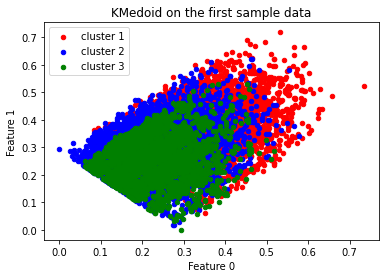

In [77]:
#Plot the results for the k-means algorithm by highlighting clusters in different colors.
#Visualizing the clusters
plt.scatter(gower_dist1[labels == 0, 0], gower_dist1[labels == 0, 1], s = 20, 
            c = 'red', label = 'cluster 1')
plt.scatter(gower_dist1[labels == 1, 0], gower_dist1[labels == 1, 1], s = 20, 
            c = 'blue', label = 'cluster 2')
plt.scatter(gower_dist1[labels == 2, 0], gower_dist1[labels == 2, 1], s = 20, 
            c = 'green', label = 'cluster 3')


#Plotting the centroids of the clusters
# plt.scatter(C[:, 0], 
#             C[:,1], s = 100, 
#             c = 'black', label = 'Centroide')

plt.title('KMedoid on the first sample data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()

Computing K-Medoid on the second sample

In [78]:
# Perform KMedoids clustering using the square distance matrix
Model2 = KMedoids(n_clusters=3, metric='precomputed', random_state=0).fit(gower_dist2)

#Get the cluster label for the inputs
labels = Model2.labels_

# get index of medoid for each cluster
medoid_cluster = Model2.cluster_centers_

In [79]:
print(labels)

[1 1 1 ... 1 2 1]


In [80]:
print(medoid_cluster)

None


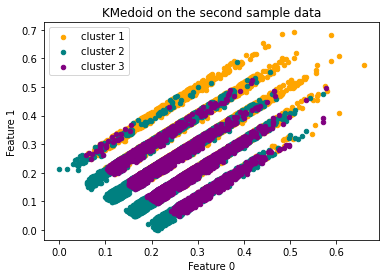

In [81]:
#Plot the results for the k-means algorithm by highlighting clusters in different colors.
#Visualizing the clusters
plt.scatter(gower_dist2[labels == 0, 0], gower_dist2[labels == 0, 1], s = 20, 
            c = 'orange', label = 'cluster 1')
plt.scatter(gower_dist2[labels == 1, 0], gower_dist2[labels == 1, 1], s = 20, 
            c = 'teal', label = 'cluster 2')
plt.scatter(gower_dist2[labels == 2, 0], gower_dist2[labels == 2, 1], s = 20, 
            c = 'purple', label = 'cluster 3')


#Plotting the centroids of the clusters
# plt.scatter(C[:, 0], 
#             C[:,1], s = 100, 
#             c = 'black', label = 'Centroide')

plt.title('KMedoid on the second sample data')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend()

It couldn't find any cluster centers in the dataset which mean that the K-medoid refused to converge. As a result, I want to check the cluster tendency of our dataset using the Hopkins test

In [45]:
#pip install numba==0.54.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.3 MB)
  Using cached llvmlite-0.37.0-cp38-cp38-manylinux2014_x86_64.whl (26.3 MB)
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [46]:
#pip install pyclustertend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pyclustertend import hopkins

In [36]:
# Calculate the Hopkins statistic
hopkins(X1, X1.shape[0])

0.20904175618416146

In [37]:
#X1a = scaler.fit_transform(X1)

In [40]:
# Calculate the Hopkins statistic for the standardized data
from sklearn.preprocessing import scale
hopkins(scale(X1), X1.shape[0])

0.17798367334215126

Computing DBSCAN for the first sample

In [99]:
from sklearn.cluster import DBSCAN


db = DBSCAN(eps = 0.065, min_samples = 15, metric = "precomputed").fit(gower_dist1)
labels = db.labels_

In [100]:
#check the number of clusters created by DBSCAN
len(set(labels))

3

In [101]:
###### Plot the clusters
from pandas import DataFrame
def plot_clusters(X, clusters):
    df = DataFrame(dict(Feature0 =X[:,0], Feature1 =X[:,1], label=clusters))
    colors = {-1: 'red', 0: 'yellow', 1: 'purple'}
    fig, ax = plt.subplots(figsize=(5,5))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Feature0', y='Feature1', label=key, color=colors[key])
    plt.title("DBSCAN on the first sample data")
    plt.show()

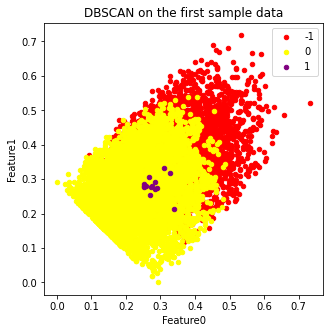

In [102]:
plot_clusters(gower_dist1, labels)

Compute DBSCAN for the second sample

In [89]:
db = DBSCAN(eps = 0.065, min_samples = 15, metric = "precomputed").fit(gower_dist2)
labels = db.labels_

In [90]:
#check the number of clusters created by DBSCAN
len(set(labels))

3

In [96]:
###### Plot the clusters
from pandas import DataFrame
def plot_clusters(X, clusters):
    df = DataFrame(dict(Feature0 =X[:,0], Feature1 =X[:,1], label=clusters))
    colors = {-1: 'orange', 0: 'blue', 1: 'green'}
    fig, ax = plt.subplots(figsize=(5,5))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='Feature0', y='Feature1', label=key, color=colors[key])
    plt.title("DBSCAN on the second sample data")
    plt.show()

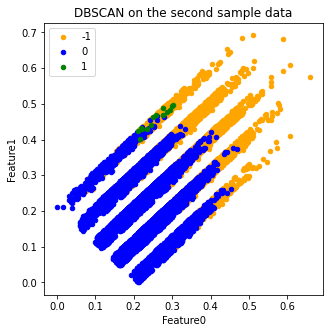

In [97]:
plot_clusters(gower_dist2, labels)

Using TSNE and UMAP to view the data on 2-dimensional plot

It is worth noting that TSNE does not really accept gower as a distance metric, it mostly uses euclidean or cosine similarity as its distance metric. However, UMAP support for Gower distance. So, I will be comparing the result of both TSNE and UMAP

In [51]:
Xdf_1b = Xdf_1.values

In [52]:
def standardize(df):
    stscaler = sklearn.preprocessing.StandardScaler().fit(df)
    scaled = stscaler.transform(df)
    return scaled

In [53]:
# standardize the data using the standardize function
standardized_Xdf_1b = standardize(Xdf_1b)

In [54]:
# Import TSNE
from sklearn.manifold import TSNE



# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to diabetes_dfX: tsne_features
tsne_features = model.fit_transform(standardized_Xdf_1b)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

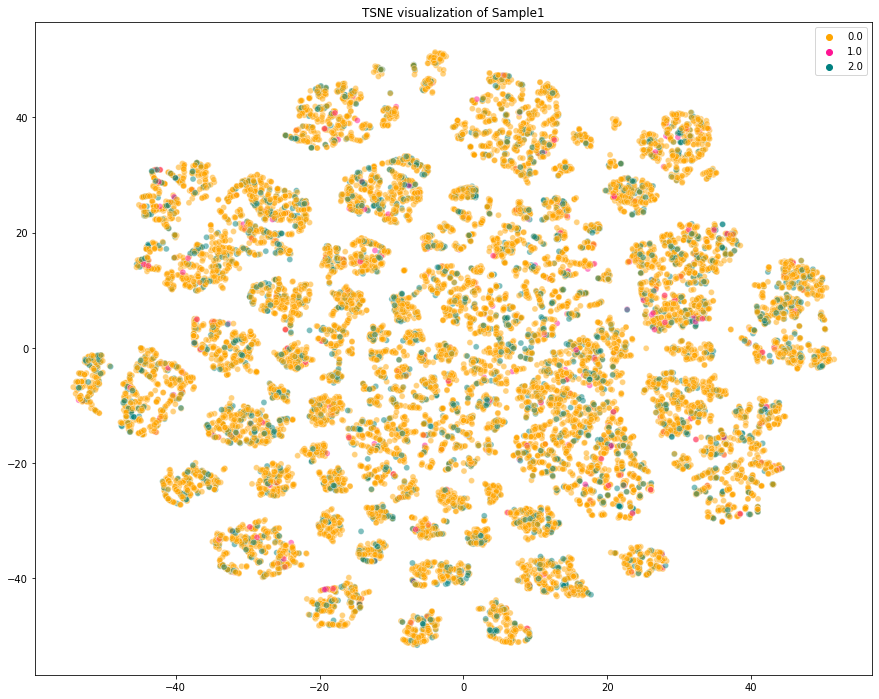

In [68]:
plt.figure(figsize=(15,12))

# Create a scatter plot with points colored by the response variable
hue_colors={0: "orange", 1: "deeppink", 2: "teal"}
sns.scatterplot(x=xs, y=ys, hue=Y1, alpha=0.5, palette=hue_colors)

plt.title('TSNE visualization of Sample1')
plt.show()

In [42]:
#pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9675e10de91ce7a92c9de73d0d7bb17f2a278667838d66a66ade9145634c8ad7
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=98603fce10213ae010e3d50b9e1554bf6e984d2f27b2c6fa87709216ef956e93
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [59]:
import umap

# create an instance of the UMAP class with the Gower distance metric
reducer = umap.UMAP(n_components=2, metric='precomputed')
X_umap = reducer.fit_transform(gower_dist1)

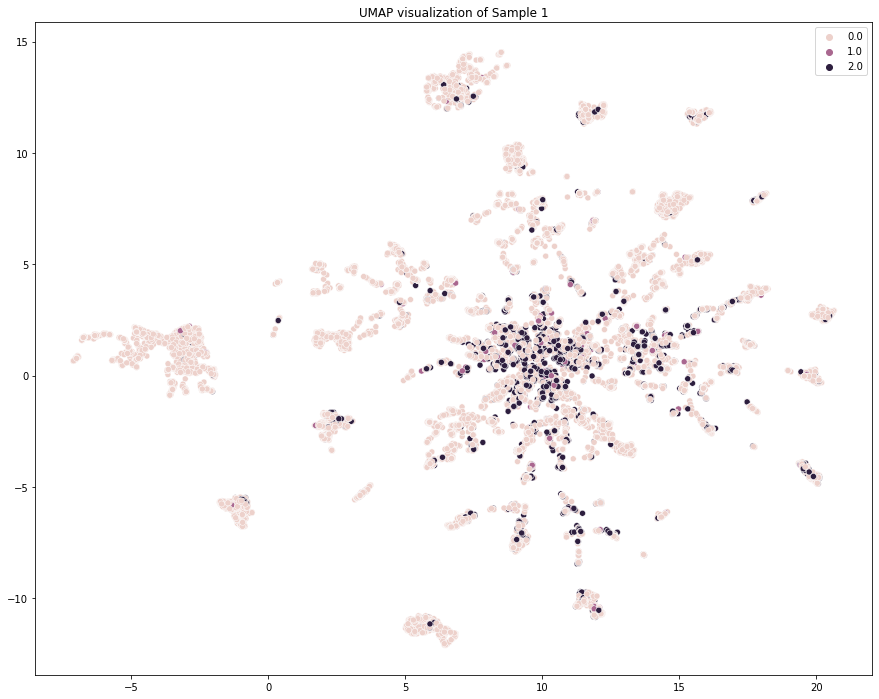

In [67]:
# create a scatter plot of the UMAP result colored by cluster labels
plt.figure(figsize=(15,12))

sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=Y1)

# add axis labels and a title
plt.title('UMAP visualization of Sample 1')
plt.show()

Using TSNE and UMAP for the second sample of the data

In [64]:
Xdf_2b = Xdf_2.values

In [65]:
# standardize the data using the standardize function: standardized_delta
standardized_Xdf_2b = standardize(Xdf_2b)

In [66]:
# Import TSNE
from sklearn.manifold import TSNE


# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to diabetes_dfX: tsne_features
tsne_features = model.fit_transform(standardized_Xdf_2b)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

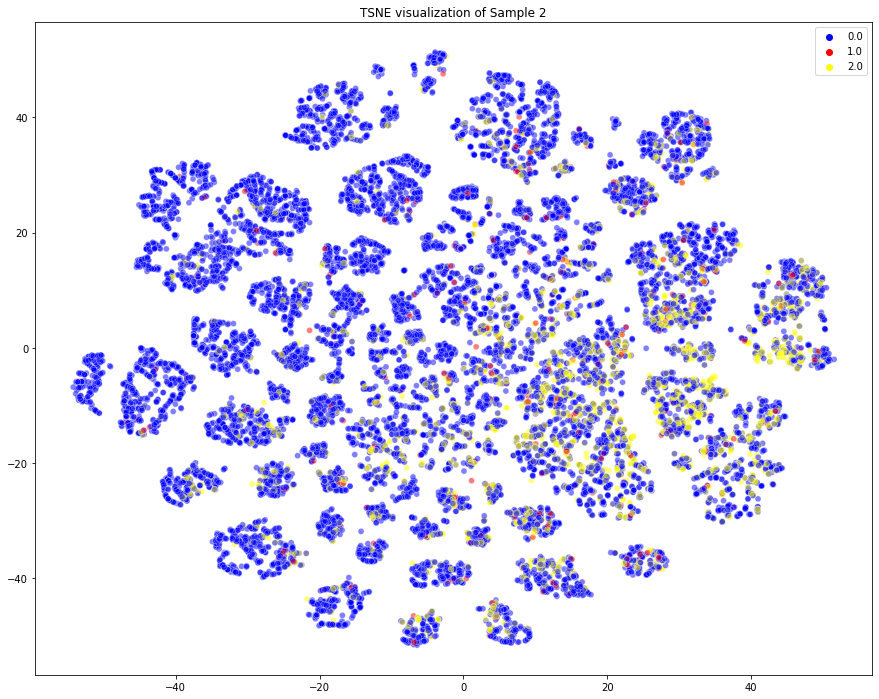

In [69]:
plt.figure(figsize=(15,12))

# Create a scatter plot with points colored by the response variable
hue_colors={0: "blue", 1: "red", 2: "yellow"}
sns.scatterplot(x=xs, y=ys, hue=Y2, alpha=0.5, palette=hue_colors)

# add axis labels and a title
plt.title('TSNE visualization of Sample 2')
plt.show()

In [70]:
# create an instance of the UMAP class with the Gower distance metric
reducer = umap.UMAP(n_components=2, metric='precomputed')
X_umap = reducer.fit_transform(gower_dist2)

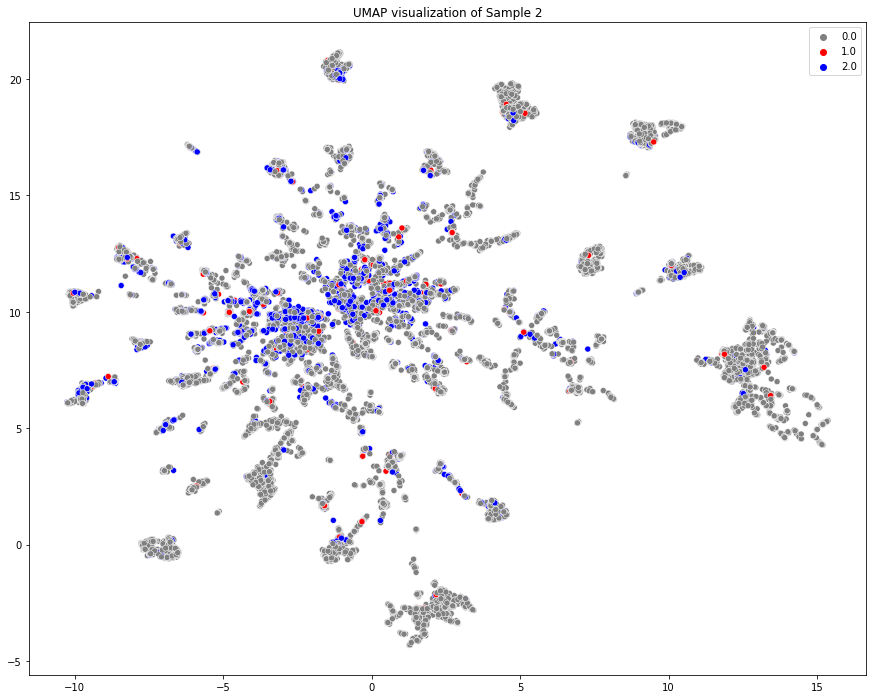

In [74]:
# create a scatter plot of the UMAP result colored by cluster labels
plt.figure(figsize=(15,12))

hue_colors={0: "grey", 1: "red", 2: "blue"}
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=Y2, palette=hue_colors)

# add axis labels and a title
plt.title('UMAP visualization of Sample 2')
plt.show()